In [1]:
!pip install import-ipynb

In [2]:
import import_ipynb

In [3]:
!pip install colorama

###install amalearn

In [4]:
! rm -r -f amalearn

In [5]:
! unzip amalearn-0.1.zip

Archive:  amalearn-0.1.zip
   creating: amalearn/
   creating: amalearn/.git/
  inflating: amalearn/.git/description  
   creating: amalearn/.git/hooks/
  inflating: amalearn/.git/hooks/applypatch-msg.sample  
  inflating: amalearn/.git/hooks/commit-msg.sample  
  inflating: amalearn/.git/hooks/fsmonitor-watchman.sample  
  inflating: amalearn/.git/hooks/post-update.sample  
  inflating: amalearn/.git/hooks/pre-applypatch.sample  
  inflating: amalearn/.git/hooks/pre-commit.sample  
  inflating: amalearn/.git/hooks/pre-merge-commit.sample  
  inflating: amalearn/.git/hooks/pre-push.sample  
  inflating: amalearn/.git/hooks/pre-rebase.sample  
  inflating: amalearn/.git/hooks/pre-receive.sample  
  inflating: amalearn/.git/hooks/prepare-commit-msg.sample  
  inflating: amalearn/.git/hooks/update.sample  
   creating: amalearn/.git/info/
  inflating: amalearn/.git/info/exclude  
   creating: amalearn/.git/refs/
   creating: amalearn/.git/refs/heads/
  inflating: amalearn/.git/refs/heads/

In [6]:
! pip install -e ./amalearn

Obtaining file:///content/amalearn
  Found existing installation: amalearn 0.1
    Can't uninstall 'amalearn'. No files were found to uninstall.
  Running setup.py develop for amalearn


### import Environment

In [7]:
import Environment

importing Jupyter notebook from Environment.ipynb
       .    .    .    .    .    .    .    .    .  
  .    .    .         .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    █    █    .    .    .    .    .  
  .         .    █    웃   .    .    .    .    .  
  .    .    .    █    .    .    .    .    .    .  
  .    .    .    █    █    .    .    .    .    .  
  .    .         .    .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
{'prob': 1.0}
action: 1
       .    .    .    .    .    .    .    .    .  
  .    .    .         .    .    .    .    .    .  
  .    .    .    .    .    .    .    .    .    .  
  .    .    .    █    █    .    .    .    .    .  
  .         .    █    .    웃   .    .    .    .  
  .    .    .    █    .    .    .    .    .    .  
  .    .    .    █    █    .    .    .    .    .  
  .    .         .    .    .    .    .    .    .  
  .    .  

### agent with On-policy Monte-Carlo

In [8]:
import operator
import numpy as np
from amalearn.agent import AgentBase

class OnPolicyAgent(AgentBase):
    def __init__(self, id, environment, s_len, a_len, disc=1, eps=0.2):
        super(OnPolicyAgent, self).__init__(id, environment)
        self.act_num = a_len
        self.s_len = s_len
        self.disc = disc
        self.eps = eps
        self.eps = 1

        self.q = [[0 for i in range(self.act_num)] for i in range(self.s_len)]
        self.r = [[[] for i in range(self.act_num)] for i in range(self.s_len)]
        self.p = [[self.eps / self.act_num for i in range(self.act_num)] for i in range(self.s_len)]
        for i in range(self.s_len):
          index = np.argmax(np.array(self.q[i]))
          self.p[i][index] += (1.0 - self.eps)

        self.s = 44
        self.episod = {'s':[], 'a':[], 'r':[], 'sp':[]}
        self.episods = []
        self.laststep = False

    def get_epses_data(self):
        return self.episods

    def reset(self):
        self.eps = 1

        self.q = [[0 for i in range(self.act_num)] for i in range(self.s_len)]
        self.r = [[[] for i in range(self.act_num)] for i in range(self.s_len)]
        self.p = [[self.eps / self.act_num for i in range(self.act_num)] for i in range(self.s_len)]
        for i in range(self.s_len):
          index = np.argmax(np.array(self.q[i]))
          self.p[i][index] += (1.0 - self.eps)

        self.s = 44
        self.episod = {'s':[], 'a':[], 'r':[], 'sp':[]}
        self.episods = []
        self.laststep = False
    
    def reset_to_new_eps(self,add_eps=False):
        self.s = 44
        self.episod = {'s':[], 'a':[], 'r':[], 'sp':[]}
        self.laststep = False
        self.eps *= 0.999

        if add_eps:
          self.episods.append(self.episod)

    def egreedy_policy(self):
        prob = [1,1,1,1]
        if self.s in range(0,10):
          prob[0] = 0
        if self.s in range(90,100):
          prob[2] = 0
        if self.s in range(0,100,10):
          prob[3] = 0
        if self.s in range(9,100,9):
          prob[1] = 0
        al = 0
        ind = 0
        j = 0
        qm = float('-inf')
        for k in prob:
          if k == 1:
            al += 1
            if self.q[self.s][j] > qm:
              qm = self.q[self.s][j]
              ind = j
          j+=1
        for s in range(4):
          if prob[s] == 1:
            prob[s] = self.eps/float(al)
            if s == ind:
              prob[s] += (1-self.eps)
        return np.random.choice(range(self.act_num), p = prob)

    def appears(self,s,a,t):
        for i in range(t):
          if self.episod['s'][i] == s and self.episod['a'][i] == a:
            return True
        return False

    def update_estimation(self, ns, r, a, d):
        if d == False or self.laststep == False:
          self.episod['s'].append(self.s)
          self.episod['a'].append(a)
          self.episod['r'].append(r)
          self.episod['sp'].append(int(ns))
          self.s = int(ns)
          if d == True:
            self.laststep = True
        else:
          self.episod['s'].append(self.s)
          self.episod['a'].append(a)
          self.episod['r'].append(r)
          self.episod['sp'].append(int(ns))
          self.episods.append(self.episod)
          # print(self.episod['r'])
          g = 0
          for i in range(len(self.episod['s'])-1, -1, -1):
            g = g + self.episod['r'][i]
            if self.appears(self.episod['s'][i],self.episod['a'][i],i) == False:
              st = self.episod['s'][i]
              at = self.episod['a'][i]
              self.r[st][at].append(g)
              self.q[st][at] = np.mean(np.array(self.r[st][at]))
              index = np.argmax(np.array(self.q[st]))
              for a in range(self.act_num):
                if a == index:
                  self.p[st][a] = (1.0 - self.eps)+(self.eps / self.act_num)
                else:
                  self.p[st][a] = (self.eps / self.act_num)

    def take_action(self) -> (object, float, bool, object):
        action = self.egreedy_policy()
        state, reward, done, info = self.environment.step(action)
        self.update_estimation(state, reward, action, done)
        # print(state, action, reward, done, info)
        # self.environment._render()
        return state, self.p, self.q, reward, done, info

In [9]:
def diff(qp,q):
  if qp is None:
    return np.abs(np.array(q)).max()
  else:
    a, b = np.array(qp), np.array(q)
    return np.abs(b-a).max()

In [10]:
env =  Environment.GridworldEnv()
agent = OnPolicyAgent('id', env, 100, 4, eps=0.2)

In [11]:
def show_policy_in_game(agent, env):
  d = False
  cc = 0
  agent.reset_to_new_eps()
  env.reset()
  while d != True and cc < 100:
    state, p, q, reward, d, info = agent.take_action()
    env._render()
    print()
    cc+=1
  env.close()

In [12]:
import copy

def run(episod_max_num, duplicate_num, max_step, agent, env):

  datas = []
  env.reset()

  for edoplic in range(duplicate_num):
    qp = None
    q = None

    for eiterate in range(episod_max_num):
        d = False
        dp = False
        stepcount = 0
        while (d != True or dp != True) and stepcount < max_step+1:
          if d == True:
            dp=True
          # if dp == True:
          #   print('ooo')
          #   break
          state, p, q, reward, d, info = agent.take_action()
          stepcount += 1
        agent.reset_to_new_eps(add_eps= (d==False))
        env.reset()
        difl = diff(qp,q)
        print(difl)
        qp = copy.deepcopy(q)
    datas.append(agent.get_epses_data())
    env.close()
    if edoplic == (duplicate_num-1):
      show_policy_in_game(agent, env)
    env.reset()
    agent.reset()
  return datas

In [13]:
datas = run(2000, 20, float('inf'), agent, env)
# show_policy_in_game(agent, env)

Streaming output truncated to the last 5000 lines.
0.3230594240692426
0.2726907630521964
0.20005960223351593
1.0876565295169769
0.6296606619187202
0.8580155497963702
0.2619731800766303
0.27051792828686416
0.0391757713957368
0.6215880893300323
0.2719385480607599
1.0685799743626205
0.20403599977640852
1.959718670076711
0.08220679576178469
0.19561887254901933
0.11176542755490004
0.20251900349552443
0.20101886272890113
0.5888824760118325
0.3182998496651521
0.12799564270152075
0.26837096060202725
0.5872015513270981
0.2309569862761407
0.266249451032067
0.2244701552519075
0.6237842286398347
0.22657345380901006
0.10931292226886313
0.03771192097183018
0.3080678314491294
0.7612116443745123
4.483974358974365
0.48118049615055725
0.267742697159818
0.03722824126531421
0.2730825846403633
0.03704391264724549
0.25517289265378906
0.0368296314939478
5.256097560975604
0.3159594095941003
0.12056615337470333
0.26555704248912093
0.22658200369043868
0.49984542854934944
0.19911535639708688
0.11951775204100912


In [14]:
import matplotlib.pyplot as plt

def vis_stat(datas):
  epis = [[] for i in range(len(datas))]
  di = 0
  for data in datas:
    for i in data:
      epis[di].append(np.sum(np.array(i['r'])))
    di+=1
  avr_e = np.mean(np.array(epis), axis=0)

  return avr_e

def vis_list(dicon, label):
  plt.plot(range(len(dicon)), dicon, label=label)
  plt.ylabel('mean of reward')
  plt.xlabel('episode')
  plt.legend()
  plt.grid()
  print('%s  : %s'%(label,str(np.sum(np.array(dicon))/len(dicon))))

on-policy  : -30.861375


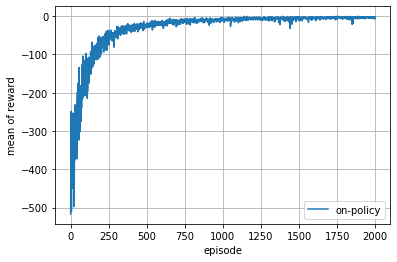

In [45]:
dicon = vis_stat(datas)
vis_list(dicon, 'on-policy')
# print(list(dicon))

### agent with Off-policy Monte-Carlo

In [17]:
np.array([1,1,1,0])*np.array([10,11,12,13])

array([10, 11, 12,  0])

In [25]:
import operator
import numpy as np
from amalearn.agent import AgentBase

class OffPolicyAgent(AgentBase):
    def __init__(self, id, environment, s_len, a_len, disc=0.9, eps=0.2):
        super(OffPolicyAgent, self).__init__(id, environment)
        self.act_num = a_len
        self.s_len = s_len
        self.disc = disc
        self.eps = eps
        self.eps = 1

        self.q = [[0 for i in range(self.act_num)] for i in range(self.s_len)]
        self.c = [[0 for i in range(self.act_num)] for i in range(self.s_len)]
        self.p = [[0 for i in range(self.act_num)] for i in range(self.s_len)]
        self.b = [[self.eps / float(self.act_num) for i in range(self.act_num)] for i in range(self.s_len)]
        for i in range(self.s_len):
          # print(i)
          # print(self.mask(i))
          # print()
          index = np.argmax(np.array(self.mask2(i))+np.array(self.q[i]))
          self.p[i][index] = 1
          temp = (np.array(self.b[i])*np.array(self.mask(i)))*(float(self.act_num)/(np.array(self.mask(i)) == 1).sum())
          self.b[i] = list(temp)
          self.b[i][index] += (1.0 - self.eps)

        self.s = 44
        self.episod = {'s':[], 'a':[], 'r':[], 'sp':[]}
        self.episods = []
        self.laststep = False

    def get_epses_data(self):
        return self.episods

    def reset(self):
        self.eps = 1

        self.q = [[0 for i in range(self.act_num)] for i in range(self.s_len)]
        self.c = [[0 for i in range(self.act_num)] for i in range(self.s_len)]
        self.p = [[0 for i in range(self.act_num)] for i in range(self.s_len)]
        self.b = [[self.eps / float(self.act_num) for i in range(self.act_num)] for i in range(self.s_len)]
        for i in range(self.s_len):
          index = np.argmax(np.array(self.mask2(i))+np.array(self.q[i]))
          self.p[i][index] = 1
          temp = (np.array(self.b[i])*np.array(self.mask(i)))*(float(self.act_num)/(np.array(self.mask(i)) == 1).sum())
          self.b[i] = list(temp)
          self.b[i][index] += (1.0 - self.eps)

        self.s = 44
        self.episod = {'s':[], 'a':[], 'r':[], 'sp':[]}
        self.episods = []
        self.laststep = False
    
    def reset_to_new_eps(self, add_eps=False):
        self.s = 44
        self.episod = {'s':[], 'a':[], 'r':[], 'sp':[]}
        self.laststep = False
        self.eps *= 0.999

        self.b = [[self.eps / float(self.act_num) for i in range(self.act_num)] for i in range(self.s_len)]
        for i in range(self.s_len):
          index = np.argmax(np.array(self.mask2(i))+np.array(self.q[i]))
          temp = (np.array(self.b[i])*np.array(self.mask(i)))*(float(self.act_num)/(np.array(self.mask(i)) == 1).sum())
          self.b[i] = list(temp)
          self.b[i][index] += (1.0 - self.eps)

        if add_eps:
          self.episods.append(self.episod)

    def mask2(self, s):
      prob = [0,0,0,0]
      if s in range(0,10):
        prob[0] = float('-inf')
      if s in range(90,100):
        prob[2] = float('-inf')
      if s in range(0,100,10):
        prob[3] = float('-inf')
      if s in range(9,100,9):
        prob[1] = float('-inf')
      return prob

    def mask(self, s):
      prob = [1,1,1,1]
      if s in range(0,10):
        prob[0] = 0
      if s in range(90,100):
        prob[2] = 0
      if s in range(0,100,10):
        prob[3] = 0
      if s in range(9,100,9):
        prob[1] = 0
      return prob

    def egreedy_policy(self):
        prob = self.mask(self.s)
        al = 0
        ind = 0
        j = 0
        qm = float('-inf')
        for k in prob:
          if k == 1:
            al += 1
            if self.q[self.s][j] > qm:
              qm = self.q[self.s][j]
              ind = j
          j+=1
        for s in range(4):
          if prob[s] == 1:
            prob[s] = self.eps/float(al)
            if s == ind:
              prob[s] += (1-self.eps)
        return np.random.choice(range(self.act_num), p = prob)

    def appears(self,s,a,t):
        for i in range(t):
          if self.episod['s'][i] == s and self.episod['a'][i] == a:
            return True
        return False

    def update_estimation(self, ns, r, a, d):
        if d == False or self.laststep == False:
          self.episod['s'].append(self.s)
          self.episod['a'].append(a)
          self.episod['r'].append(r)
          self.episod['sp'].append(int(ns))
          self.s = int(ns)
          if d == True:
            self.laststep = True
        else:
          self.episod['s'].append(self.s)
          self.episod['a'].append(a)
          self.episod['r'].append(r)
          self.episod['sp'].append(int(ns))
          self.episods.append(self.episod)
          # self.environment._render()
          g = 0
          w = 1
          for i in range(len(self.episod['s'])-1, -1, -1):
            # print(self.episod['r'])
            # print('i', i)
            g = (self.disc * g) + self.episod['r'][i]
            self.c[int(self.episod['s'][i])][int(self.episod['a'][i])] += w
            self.q[int(self.episod['s'][i])][int(self.episod['a'][i])] +=\
              (float(w)/self.c[int(self.episod['s'][i])][int(self.episod['a'][i])])*(g-self.q[int(self.episod['s'][i])][int(self.episod['a'][i])])
            index = np.argmax(np.array(self.mask(int(self.episod['s'][i])))*np.array(self.q[int(self.episod['s'][i])]))
            for j in range(self.act_num):
              self.p[int(self.episod['s'][i])][j] = 0
            self.p[int(self.episod['s'][i])][index] = 1
            if self.p[int(self.episod['s'][i])][int(self.episod['a'][i])] == 0:
              break
            w *= 1/float(self.b[int(self.episod['s'][i])][int(self.episod['a'][i])])
            # if g!=0:
            #   print(g)
            #   print(int(self.episod['s'][i]),int(self.episod['a'][i]))
            #   print(self.q[int(self.episod['s'][i])][int(self.episod['a'][i])])
            #   print(self.c[int(self.episod['s'][i])][int(self.episod['a'][i])])
            #   print(self.p[int(self.episod['s'][i])])

    def take_action(self) -> (object, float, bool, object):
        action = self.egreedy_policy()
        state, reward, done, info = self.environment.step(action)
        self.update_estimation(state, reward, action, done)
        # print(state, action, reward, done, info)
        # self.environment._render()
        return state, self.p, self.q, reward, done, info

In [26]:
env2 =  Environment.GridworldEnv()
agent2 = OffPolicyAgent('id', env2, 100, 4)

In [27]:
datas_off = run(2000, 20, float('inf'), agent2, env2)
# show_policy_in_game(agent2, env2)

Streaming output truncated to the last 5000 lines.
0.0
0.0
0.0
1.2574510961815832e-05
1.2568450961758515e-05
1.2562401207283358e-05
0.0008071401064521089
3.6549106303462864e-05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.250450626399946e-05
0.0
3.626515647869866e-05
13.837738533
0.0
0.0
0.0
0.0
0.0
3.606904024877622e-05
0.0
0.0
0.0
1.243075931944837e-05
0.0
0.0
0.0
0.0
0.0
0.0
11.905676999999999
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.00028647736876519225
0.0
0.0
0.0
0.0
11.905676999999999
1.230971837706818e-05
0.0
0.0
0.0
0.0
0.0
13.708598369999999
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.2234890781392949e-05
0.0
0.0
0.0
1.1622614670000004
0.0
0.00027630917074072947
0.0
0.0
0.0006751044417493413
0.0
0.0
1.2172085401385146e-05
0.0
0.0
0.0
0.0
0.00011477309885044029
0.0
0.0
0.0
1.212573384345994e-05
1.2120436372331511e-05
1.2115147483005018e-05
0.0
0.0006453910432964172
0.0
0.0
0.0
1.2084652997179646e-05
0.00011327045715536777
0.0
3.422547065290438e-05
0.0
0.0
0.0
0.0
0.0
0.0006220011258399882
0.0
0.0
0.0
0.0
0.0
0.0

off-policy MC  : -31.541875


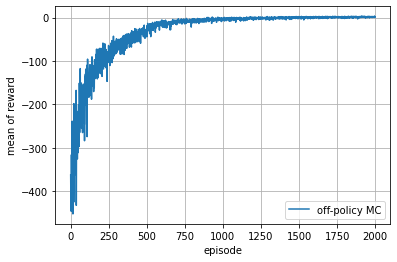

In [44]:
dicof = vis_stat(datas_off)
vis_list(dicof, 'off-policy MC')
# print(list(dicof))

### agent with SARSA

In [37]:
import operator
import numpy as np
from amalearn.agent import AgentBase

class SarsaAgent(AgentBase):
    def __init__(self, id, environment, s_len, a_len, disc=1, eps=0.2, lr=0.2):
        super(SarsaAgent, self).__init__(id, environment)
        self.act_num = a_len
        self.s_len = s_len
        self.disc = disc
        self.eps = eps
        self.lr = lr
        # self.lr = 1
        self.eps = 1

        self.q = [[0 for i in range(self.act_num)] for i in range(self.s_len)]
        # self.r = [[[] for i in range(self.act_num)] for i in range(self.s_len)]
        self.p = [[self.eps / self.act_num for i in range(self.act_num)] for i in range(self.s_len)]
        for i in range(self.s_len):
          index = np.argmax(np.array(self.mask2(i))+np.array(self.q[i]))
          temp = (np.array(self.p[i])*np.array(self.mask(i)))*(float(self.act_num)/(np.array(self.mask(i)) == 1).sum())
          self.p[i] = list(temp)
          self.p[i][index] += (1.0 - self.eps)

        self.s = 44
        self.action = np.random.choice(range(self.act_num), p = self.p[self.s])
        self.episod = {'s':[], 'a':[], 'r':[], 'sp':[]}
        self.episods = []
        self.laststep = False

    def get_epses_data(self):
        return self.episods

    def mask2(self, s):
      prob = [0,0,0,0]
      if s in range(0,10):
        prob[0] = float('-inf')
      if s in range(90,100):
        prob[2] = float('-inf')
      if s in range(0,100,10):
        prob[3] = float('-inf')
      if s in range(9,100,9):
        prob[1] = float('-inf')
      return prob

    def mask(self, s):
      prob = [1,1,1,1]
      if s in range(0,10):
        prob[0] = 0
      if s in range(90,100):
        prob[2] = 0
      if s in range(0,100,10):
        prob[3] = 0
      if s in range(9,100,9):
        prob[1] = 0
      return prob

    def reset(self):
        # self.lr = 1
        self.eps = 1

        self.q = [[0 for i in range(self.act_num)] for i in range(self.s_len)]
        # self.r = [[[] for i in range(self.act_num)] for i in range(self.s_len)]
        self.p = [[self.eps / self.act_num for i in range(self.act_num)] for i in range(self.s_len)]
        for i in range(self.s_len):
          index = np.argmax(np.array(self.mask2(i))+np.array(self.q[i]))
          temp = (np.array(self.p[i])*np.array(self.mask(i)))*(float(self.act_num)/(np.array(self.mask(i)) == 1).sum())
          self.p[i] = list(temp)
          self.p[i][index] += (1.0 - self.eps)

        self.s = 44
        self.action = np.random.choice(range(self.act_num), p = self.p[self.s])
        self.episod = {'s':[], 'a':[], 'r':[], 'sp':[]}
        self.episods = []
        self.laststep = False
    
    def reset_to_new_eps(self,add_eps=False):
        self.s = 44
        self.episod = {'s':[], 'a':[], 'r':[], 'sp':[]}
        self.laststep = False
        self.eps *= 0.999
        # self.lr *= 0.99

        if add_eps:
          self.episods.append(self.episod)

        self.p = [[self.eps / self.act_num for i in range(self.act_num)] for i in range(self.s_len)]
        for i in range(self.s_len):
          index = np.argmax(np.array(self.mask2(i))+np.array(self.q[i]))
          temp = (np.array(self.p[i])*np.array(self.mask(i)))*(float(self.act_num)/(np.array(self.mask(i)) == 1).sum())
          self.p[i] = list(temp)
          self.p[i][index] += (1.0 - self.eps)

    def egreedy_policy(self):
        return np.random.choice(range(self.act_num), p = self.p[self.s])

    def appears(self,s,a,t):
        for i in range(t):
          if self.episod['s'][i] == s and self.episod['a'][i] == a:
            return True
        return False

    def update_estimation(self, ns, r, a, d):
        if d == False or self.laststep == False:
          self.episod['s'].append(self.s)
          self.episod['a'].append(a)
          self.episod['r'].append(r)
          self.episod['sp'].append(int(ns))

          st = self.s
          at = a
          rt = r
          sp = int(ns)
          ap = np.random.choice(range(self.act_num), p = self.p[sp])

          self.q[st][at] += self.lr*(rt+(self.disc*self.q[sp][ap])-self.q[st][at])

          self.s = int(ns)
          self.action = ap

          if d == True:
            self.laststep = True
        else:
          self.episod['s'].append(self.s)
          self.episod['a'].append(a)
          self.episod['r'].append(r)
          self.episod['sp'].append(int(ns))

          st = self.s
          at = a
          rt = r
          sp = int(ns)
          ap = np.random.choice(range(self.act_num), p = self.p[sp])

          self.q[st][at] += self.lr*(rt+(self.disc*self.q[sp][ap])-self.q[st][at])

          self.s = int(ns)
          self.action = ap

          self.episods.append(self.episod)
          # print(self.episod['r'])

    def take_action(self) -> (object, float, bool, object):
        # action = self.egreedy_policy()
        state, reward, done, info = self.environment.step(self.action)
        self.update_estimation(state, reward, self.action, done)
        # print(state, action, reward, done, info)
        # self.environment._render()
        return state, self.p, self.q, reward, done, info

In [40]:
env =  Environment.GridworldEnv()
agent = SarsaAgent('id', env, 100, 4, eps=0.5)

In [41]:
datas_sarsa = run(2000, 20, float('inf'), agent, env)
# show_policy_in_game(agent, env)

Streaming output truncated to the last 5000 lines.
18.92630250939527
6.842079564114357
5.311115108801829
11.681977716234712
25.170880480107144
17.089696007289177
8.151451422895718
9.453838362490245
20.580517723926818
6.645951987832603
11.395202574753085
6.354291956954825
11.478169209442967
8.874190160733349
23.915567174734548
11.209031861074493
12.002923194452706
27.45813724073895
7.027042603599
10.518329468579793
16.380353363444982
4.155244026893854
14.2996331239666
16.43126667440407
21.647168234069483
15.078778302750663
13.09652320253764
7.757777472366911
6.993622509649555
20.499098333117843
13.395380702514785
8.95844930722106
14.064141729002074
7.97350354662035
12.663878176226547
20.753092981757874
5.68232632198837
6.4582662538892635
5.2266865712579715
32.085271517952236
7.315402120374642
12.2466755317663
7.585458359568321
9.411168936213784
10.098827868579974
11.102391738289555
8.386279384764975
12.57360017675262
13.228893006696126
8.52841606819834
18.31259894424295
8.04120616933474

sarsa  : -31.023625


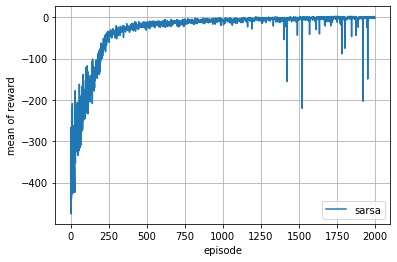

In [43]:
dicsa = vis_stat(datas_sarsa)
vis_list(dicsa, 'sarsa')
# print(list(dicsa))

### agent with two-step expected-SARSA

In [46]:
import operator
import numpy as np
from amalearn.agent import AgentBase

class ESarsaAgent(AgentBase):
    def __init__(self, id, environment, s_len, a_len, disc=1, eps=0.5, lr=0.2):
        super(ESarsaAgent, self).__init__(id, environment)
        self.act_num = a_len
        self.s_len = s_len
        self.disc = disc
        self.eps = eps
        self.lr = lr
        self.lr = 1
        self.eps = 1

        self.q = [[0 for i in range(self.act_num)] for i in range(self.s_len)]
        self.p = [[self.eps / self.act_num for i in range(self.act_num)] for i in range(self.s_len)]
        for i in range(self.s_len):
          index = np.argmax(np.array(self.mask2(i))+np.array(self.q[i]))
          temp = (np.array(self.p[i])*np.array(self.mask(i)))*(float(self.act_num)/(np.array(self.mask(i)) == 1).sum())
          self.p[i] = list(temp)
          self.p[i][index] += (1.0 - self.eps)

        self.s = 44
        self.action = np.random.choice(range(self.act_num), p = self.p[self.s])
        self.episod = {'s':[], 'a':[], 'r':[], 'sp':[]}
        self.episods = []
        self.laststep = False
        self.t = 0
        self.T = float('inf')
        # print(self.p)

    def get_epses_data(self):
        return self.episods

    def mask(self, s):
      prob = [1,1,1,1]
      if s in range(0,10):
        prob[0] = 0
      if s in range(90,100):
        prob[2] = 0
      if s in range(0,100,10):
        prob[3] = 0
      if s in range(9,100,9):
        prob[1] = 0
      return prob

    def mask2(self, s):
      prob = [0,0,0,0]
      if s in range(0,10):
        prob[0] = float('-inf')
      if s in range(90,100):
        prob[2] = float('-inf')
      if s in range(0,100,10):
        prob[3] = float('-inf')
      if s in range(9,100,9):
        prob[1] = float('-inf')
      return prob

    def reset(self):
        self.lr = 1
        self.eps = 1

        self.q = [[0 for i in range(self.act_num)] for i in range(self.s_len)]
        self.p = [[self.eps / self.act_num for i in range(self.act_num)] for i in range(self.s_len)]
        for i in range(self.s_len):
          index = np.argmax(np.array(self.mask2(i))+np.array(self.q[i]))
          temp = (np.array(self.p[i])*np.array(self.mask(i)))*(float(self.act_num)/(np.array(self.mask(i)) == 1).sum())
          self.p[i] = list(temp)
          self.p[i][index] += (1.0 - self.eps)

        self.s = 44
        self.action = np.random.choice(range(self.act_num), p = self.p[self.s])
        self.episod = {'s':[], 'a':[], 'r':[], 'sp':[]}
        self.episods = []
        self.laststep = False
        self.t = 0
        self.T = float('inf')
    
    def reset_to_new_eps(self,add_eps=False):
        self.s = 44
        self.episod = {'s':[], 'a':[], 'r':[], 'sp':[]}
        self.laststep = False
        self.t = 0
        self.T = float('inf')
        self.eps *= 0.999
        self.lr *= 0.999

        if add_eps:
          self.episods.append(self.episod)

        self.p = [[self.eps / self.act_num for i in range(self.act_num)] for i in range(self.s_len)]
        for i in range(self.s_len):
          index = np.argmax(np.array(self.mask2(i))+np.array(self.q[i]))
          temp = (np.array(self.p[i])*np.array(self.mask(i)))*(float(self.act_num)/(np.array(self.mask(i)) == 1).sum())
          self.p[i] = list(temp)
          self.p[i][index] += (1.0 - self.eps)

    def egreedy_policy(self):
        return np.random.choice(range(self.act_num), p = self.p[self.s])

    def update_estimation(self, ns, r, a, d):
        if d == False or self.laststep == False:
          self.episod['s'].append(self.s)
          self.episod['a'].append(a)
          self.episod['r'].append(r)
          self.episod['sp'].append(int(ns))

          st = self.s
          at = a
          rt = r
          sp = int(ns)
          # print(self.episod)
          if (len(self.episod['r'])-1) >= 1:
            su = 0
            for a in range(self.act_num):
              su += self.q[sp][a] * self.p[sp][a]
            su *= self.disc * self.disc
            g = self.episod['r'][-2] + (self.disc * self.episod['r'][-1]) + su

            # print(self.episod['s'][-2],self.episod['a'][-2])
            # print(self.q[self.episod['s'][-2]][self.episod['a'][-2]])
            self.q[self.episod['s'][-2]][self.episod['a'][-2]] += self.lr *\
                (g - self.q[self.episod['s'][-2]][self.episod['a'][-2]])
            # print(self.q[self.episod['s'][-2]][self.episod['a'][-2]])

          self.s = int(ns)

          if d == True:
            self.laststep = True
        else:
          self.episod['s'].append(self.s)
          self.episod['a'].append(a)
          self.episod['r'].append(r)
          self.episod['sp'].append(int(ns))

          st = self.s
          at = a
          rt = r
          sp = int(ns)

          if (len(self.episod['r'])-1) >= 1:
            su = 0
            for a in range(self.act_num):
              su += self.q[sp][a] * self.p[sp][a]
            su *= self.disc * self.disc
            g = self.episod['r'][-2] + (self.disc * self.episod['r'][-1]) + su

            # print(self.episod['s'][-2],self.episod['a'][-2])
            # print(self.q[self.episod['s'][-2]][self.episod['a'][-2]])
            self.q[self.episod['s'][-2]][self.episod['a'][-2]] += self.lr *\
                (g - self.q[self.episod['s'][-2]][self.episod['a'][-2]])
            # print(self.q[self.episod['s'][-2]][self.episod['a'][-2]])

          # print(self.episod['s'][-1],self.episod['a'][-1])
          # print(self.q[self.episod['s'][-2]][self.episod['a'][-2]])
          self.q[self.episod['s'][-1]][self.episod['a'][-1]] += self.lr *\
                (self.episod['r'][-1] - self.q[self.episod['s'][-1]][self.episod['a'][-1]])

          self.s = int(ns)

          self.episods.append(self.episod)

    def take_action(self) -> (object, float, bool, object):
        action = self.egreedy_policy()
        # print(action)
        state, reward, done, info = self.environment.step(action)
        self.update_estimation(state, reward, action, done)
        # print(state, action, reward, done, info)
        # self.environment._render()
        # print(self.episod)
        # print(self.q)
        return state, self.p, self.q, reward, done, info

In [47]:
env =  Environment.GridworldEnv()
agent = ESarsaAgent('id', env, 100, 4, eps=0.5)

In [48]:
datas_esarsa = run(2000, 20, 20000, agent, env)
# show_policy_in_game(agent, env)

Streaming output truncated to the last 5000 lines.
6.577021038057926
3.2999614988128227
2.0507268319264735
0.8472069540658093
0.6752442660387733
1.8944301470616205
3.1361092018703576
1.0999429765223754
1.557936781032169
6.753357876207467
5.027753434295422
2.31498962910635
2.4795842881810968
2.144967696842313
1.4592410509766287
2.027994846162539
1.1462370095591758
2.181234765567899
1.0485795689559525
2.7544270430066145
1.0481104309688916
0.720384981710283
0.4953683231404171
0.3846337700899789
2.5085749391975973
6.546372108671026
3.8705348033639826
2.4612365771701192
4.196100726387243
2.8792243789375953
1.9765528234181438
1.2323179161666666
0.9793594694662686
2.123708780487794
1.0799166128961901
0.5440540932162199
1.403179417596209
1.506044990053038
2.763135799665107
1.0420789894931788
2.1791605433459393
1.8888562536653168
2.429326519342247
2.3819943009925746
0.4373340771778609
1.9215726205569688
0.991154632375455
1.2889514717102597
2.014389521844512
1.2648252939437432
0.2696801842503591

expected-sarsa  : -28.2425


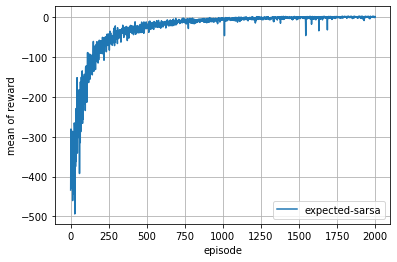

In [50]:
dicesa = vis_stat(datas_esarsa)
vis_list(dicesa, 'expected-sarsa')
# print(list(dicesa))

### Tree Back-up

In [51]:
import operator
import numpy as np
from amalearn.agent import AgentBase

class TBAgent(AgentBase):
    def __init__(self, id, environment, s_len, a_len, disc=1, eps=0.5, lr=0.2):
        super(TBAgent, self).__init__(id, environment)
        self.act_num = a_len
        self.s_len = s_len
        self.disc = disc
        self.eps = eps
        self.lr = lr
        self.lr = 1
        self.eps = 1

        self.q = [[0 for i in range(self.act_num)] for i in range(self.s_len)]
        self.p = [[self.eps / self.act_num for i in range(self.act_num)] for i in range(self.s_len)]
        for i in range(self.s_len):
          index = np.argmax(np.array(self.mask2(i))+np.array(self.q[i]))
          temp = (np.array(self.p[i])*np.array(self.mask(i)))*(float(self.act_num)/(np.array(self.mask(i)) == 1).sum())
          self.p[i] = list(temp)
          self.p[i][index] += (1.0 - self.eps)

        self.s = 44
        self.action = np.random.choice(range(self.act_num), p = self.p[self.s])
        self.episod = {'s':[], 'a':[], 'r':[], 'sp':[]}
        self.episods = []
        self.laststep = False
        self.t = 0
        # self.T = float('inf')

    def get_epses_data(self):
        return self.episods

    def mask(self, s):
      prob = [1,1,1,1]
      if s in range(0,10):
        prob[0] = 0
      if s in range(90,100):
        prob[2] = 0
      if s in range(0,100,10):
        prob[3] = 0
      if s in range(9,100,9):
        prob[1] = 0
      return prob

    def mask2(self, s):
      prob = [0,0,0,0]
      if s in range(0,10):
        prob[0] = float('-inf')
      if s in range(90,100):
        prob[2] = float('-inf')
      if s in range(0,100,10):
        prob[3] = float('-inf')
      if s in range(9,100,9):
        prob[1] = float('-inf')
      return prob

    def reset(self):
        self.lr = 1
        self.eps = 1

        self.q = [[0 for i in range(self.act_num)] for i in range(self.s_len)]
        self.p = [[self.eps / self.act_num for i in range(self.act_num)] for i in range(self.s_len)]
        for i in range(self.s_len):
          index = np.argmax(np.array(self.mask2(i))+np.array(self.q[i]))
          temp = (np.array(self.p[i])*np.array(self.mask(i)))*(float(self.act_num)/(np.array(self.mask(i)) == 1).sum())
          self.p[i] = list(temp)
          self.p[i][index] += (1.0 - self.eps)

        self.s = 44
        self.action = np.random.choice(range(self.act_num), p = self.p[self.s])
        self.episod = {'s':[], 'a':[], 'r':[], 'sp':[]}
        self.episods = []
        self.laststep = False
        self.t = 0
        # self.T = float('inf')
    
    def reset_to_new_eps(self,add_eps=False):
        self.s = 44
        self.episod = {'s':[], 'a':[], 'r':[], 'sp':[]}
        self.laststep = False
        # self.t = 0
        # self.T = float('inf')
        self.eps *= 0.999
        self.lr *= 0.999
        
        # self.eps *= ((float(1)*(self.t+1))/(self.t+2))
        # self.lr *= ((float(1)*(self.t+1))/(self.t+2))
        # self.t += 1

        if add_eps:
          self.episods.append(self.episod)

        self.p = [[self.eps / self.act_num for i in range(self.act_num)] for i in range(self.s_len)]
        for i in range(self.s_len):
          index = np.argmax(np.array(self.mask2(i))+np.array(self.q[i]))
          temp = (np.array(self.p[i])*np.array(self.mask(i)))*(float(self.act_num)/(np.array(self.mask(i)) == 1).sum())
          self.p[i] = list(temp)
          self.p[i][index] += (1.0 - self.eps)

    def egreedy_policy(self):
        return np.random.choice(range(self.act_num), p = self.p[self.s])

    def update_episode(self, a, r, ns):
        self.episod['s'].append(self.s)
        self.episod['a'].append(a)
        self.episod['r'].append(r)
        self.episod['sp'].append(int(ns))

        self.s = int(ns)

    def update_q(self, st, at):
        s3 = 0
        for a in range(self.act_num):
          s3 += self.p[self.episod['sp'][-1]][a] * self.q[self.episod['sp'][-1]][a]
        s2 = 0
        for a in range(self.act_num):
          if a != self.episod['a'][-1]:
            s2 += self.p[self.episod['s'][-1]][a] * self.q[self.episod['s'][-1]][a]
        s1 = 0
        for a in range(self.act_num):
          if a != self.episod['a'][-2]:
            s1 += self.p[self.episod['s'][-2]][a] * self.q[self.episod['s'][-2]][a]
        g3 = self.episod['r'][-1] + (self.disc*s3)
        g2 = self.episod['r'][-2] + (self.disc*s2) +\
          (self.disc*self.p[self.episod['s'][-1]][self.episod['a'][-1]]*g3)
        g = self.episod['r'][-3] + (self.disc*s1) +\
          (self.disc*self.p[self.episod['s'][-2]][self.episod['a'][-2]]*g2)

        # print(self.episod['s'][-3],self.episod['a'][-3])
        # print(self.q[self.episod['s'][-3]][self.episod['a'][-3]])
        self.q[self.episod['s'][-3]][self.episod['a'][-3]] += self.lr * (g - self.q[self.episod['s'][-3]][self.episod['a'][-3]])
        # self.q[self.episod['s'][-2]][self.episod['a'][-2]] += self.lr * (g2 - self.q[self.episod['s'][-2]][self.episod['a'][-2]])
        # print(self.q[self.episod['s'][-3]][self.episod['a'][-3]])

    def update_estimation(self, ns, r, a, d):
        if d == False or self.laststep == False:
          self.episod['s'].append(self.s)
          self.episod['a'].append(a)
          self.episod['r'].append(r)
          self.episod['sp'].append(int(ns))

          st = self.s
          at = a
          rt = r
          sp = int(ns)
          
          if len(self.episod['r'])-1 >= 2:
            self.update_q(st, at)

          self.s = int(ns)

          if d == True:
            self.laststep = True
            # self.T = self.t+1
        else:
          self.episod['s'].append(self.s)
          self.episod['a'].append(a)
          self.episod['r'].append(r)
          self.episod['sp'].append(int(ns))

          st = self.s
          at = a
          rt = r
          sp = int(ns)

          if len(self.episod['r'])-1 >= 2:
            self.update_q(st, at)

          self.q[self.episod['s'][-2]][self.episod['a'][-2]] += self.lr *\
                (self.episod['r'][-2] + self.disc*self.episod['r'][-1] - self.q[self.episod['s'][-2]][self.episod['a'][-2]])
          self.q[self.episod['s'][-1]][self.episod['a'][-1]] += self.lr *\
                (self.episod['r'][-1] - self.q[self.episod['s'][-1]][self.episod['a'][-1]])

          self.s = int(ns)
          self.episods.append(self.episod)

    def take_action(self) -> (object, float, bool, object):
        # action = self.egreedy_policy()
        # state, reward, done, info = self.environment.step(action)
        # self.update_episode(action, reward, state)
        # action = self.egreedy_policy()
        # state, reward, done, info = self.environment.step(action)
        # self.update_episode(action, reward, state)
        action = self.egreedy_policy()
        state, reward, done, info = self.environment.step(action)
        self.update_estimation(state, reward, action, done)
        # print(state, action, reward, done, info)
        # self.environment._render()
        # print(self.episod)
        # print(self.q)
        return state, self.p, self.q, reward, done, info

In [52]:
env =  Environment.GridworldEnv()
agent = TBAgent('id', env, 100, 4, eps=0.5)

In [53]:
datas_tb = run(2000, 20, 20000, agent, env)
# show_policy_in_game(agent, env)

Streaming output truncated to the last 5000 lines.
0.2733607659257255
0.7453932640526588
9.59854761819382
0.2879294999477535
0.9802655209817472
0.13024432206274472
0.1347326281000596
0.10144823186508489
0.6842233033394933
0.4755476065758373
0.17723390276991857
0.618183151680062
0.1400010237824253
0.43604108381205275
0.22113805034655254
0.3448095529667954
0.30717407690523624
0.307346314002666
0.3072765914392126
0.337898627728499
0.23486753471887756
0.1592095771480011
0.49158590815559133
0.2738204796104142
0.4489472333336775
0.14729111270116624
0.4139813297281014
0.3548900838648632
0.2814681576681246
0.4903739839897563
0.32981593191125347
0.2887585246853819
0.23067379703643542
0.568807129126712
0.4325786206557618
0.45558518802519155
0.3020342510920302
0.3062658742862938
0.33690705007114996
0.4072516852340744
0.313655769947943
0.2636000375816687
0.36092927093219274
0.24699329279618887
0.3422754203914744
0.2771004126056207
1.4173843393591596
0.19926845736340226
0.22489812654424418
0.147132

TB  : -23.695375


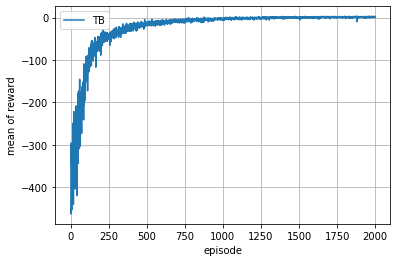

In [55]:
dictb = vis_stat(datas_tb)
vis_list(dictb, 'TB')
# print(list(dictb))

### Double Q-learning

In [58]:
import operator
import numpy as np
from amalearn.agent import AgentBase

class DQAgent(AgentBase):
    def __init__(self, id, environment, s_len, a_len, disc=0.9, eps=0.2, lr=0.2):
        super(DQAgent, self).__init__(id, environment)
        self.act_num = a_len
        self.s_len = s_len
        self.disc = disc
        self.eps = eps
        self.lr = 1
        self.eps = 1

        self.qa = [[0 for i in range(self.act_num)] for i in range(self.s_len)]
        self.qb = [[0 for i in range(self.act_num)] for i in range(self.s_len)]

        self.s = 44
        self.episod = {'s':[], 'a':[], 'r':[], 'sp':[]}
        self.episods = []
        self.laststep = False

    def get_epses_data(self):
        return self.episods

    def reset(self):
        self.lr = 1
        self.eps = 1

        self.qa = [[0 for i in range(self.act_num)] for i in range(self.s_len)]
        self.qb = [[0 for i in range(self.act_num)] for i in range(self.s_len)]

        self.s = 44
        self.episod = {'s':[], 'a':[], 'r':[], 'sp':[]}
        self.episods = []
        self.laststep = False
    
    def reset_to_new_eps(self,add_eps=False):
        self.s = 44
        self.episod = {'s':[], 'a':[], 'r':[], 'sp':[]}
        self.laststep = False
        self.lr *= 0.99
        self.eps *= 0.99

        if add_eps:
          self.episods.append(self.episod)

    def mask(self, s):
        prob = [0,0,0,0]
        if s in range(0,10):
          prob[0] = float('-inf')
        if s in range(90,100):
          prob[2] = float('-inf')
        if s in range(0,100,10):
          prob[3] = float('-inf')
        if s in range(9,100,9):
          prob[1] = float('-inf')

        return prob

    def egreedy_policy(self):
        if np.random.rand() < self.eps:
            return np.random.choice(range(self.act_num))
        else:
            q_table = (np.array(self.qa[self.s])+(np.array(self.mask(self.s)))) + \
                (np.array(self.qb[self.s])+(np.array(self.mask(self.s))))
            return np.argmax(q_table)

    def update_q(self, r, a, ns):
        if np.random.rand() < 0.5:
            # If Update(A)
            self.qa[self.s][a] += self.lr *\
             (r + self.disc * self.qb[ns][np.argmax(self.qa[ns])] - self.qa[self.s][a])

        else:
            # If Update(B)
            self.qb[self.s][a] += self.lr *\
             (r + self.disc * self.qa[ns][np.argmax(self.qb[ns])] - self.qb[self.s][a])

    def update_estimation(self, ns, r, a, d):
        if d == False or self.laststep == False:
          self.episod['s'].append(self.s)
          self.episod['a'].append(a)
          self.episod['r'].append(r)
          self.episod['sp'].append(int(ns))

          self.update_q(r, a, int(ns))
          self.s = int(ns)

          if d == True:
            self.laststep = True
        else:
          self.episod['s'].append(self.s)
          self.episod['a'].append(a)
          self.episod['r'].append(r)
          self.episod['sp'].append(int(ns))
          self.episods.append(self.episod)
          
          self.update_q(r, a, int(ns))
          self.s = int(ns)

    def take_action(self) -> (object, float, bool, object):
        action = self.egreedy_policy()
        state, reward, done, info = self.environment.step(action)
        self.update_estimation(state, reward, action, done)
        # print(state, action, reward, done, info)
        # self.environment._render()
        return state, np.array(self.qa)+np.array(self.qb), np.array(self.qa)+np.array(self.qb), reward, done, info

In [59]:
env =  Environment.GridworldEnv()
agent = DQAgent('id', env, 100, 4, eps=0.5)

In [60]:
datas_dq = run(2000, 20, float('inf'), agent, env)
# show_policy_in_game(agent, env)

Streaming output truncated to the last 5000 lines.
6.783187338044172e-06
6.5370808499665145e-06
6.648106904094675e-06
6.122694969690201e-06
6.061383956534883e-06
6.0006877404816805e-06
6.216729033781121e-06
6.322398121483275e-06
6.092852977701568e-06
6.031844904441641e-06
6.134534864088437e-06
6.0731110167466795e-06
6.0123029754777235e-06
5.952163377287434e-06
5.735988381161405e-06
5.833642163111108e-06
5.621827803281576e-06
5.717537256089145e-06
5.509819999360843e-06
5.454656758274723e-06
5.54765384208622e-06
5.492163211329171e-06
5.4371786575302394e-06
5.382745200677164e-06
5.328857312747459e-06
5.135204382611391e-06
4.725888260281863e-06
4.6786221901129466e-06
5.118909086831991e-06
4.714574217246081e-06
4.883548861300824e-06
4.834662270525314e-06
4.917191581910174e-06
4.73835380176979e-06
4.690922146721732e-06
4.438536684858718e-06
4.597563169284058e-06
4.350122779328558e-06
4.506062417419798e-06
4.58316759477384e-06
3.93540904042311e-06
4.491986558718963e-06
4.136959248057792e-06
4

DQ  : -0.31975
[-424.5, -460.75, -455.75, -257.0, -210.25, -172.0, -176.0, -294.5, -117.75, -123.5, -142.75, -104.25, -117.5, -127.5, -127.25, -105.25, -79.0, -96.0, -103.25, -86.5, -106.25, -95.75, -95.0, -71.25, -55.0, -77.5, -40.75, -69.25, -58.75, -74.25, -50.0, -74.25, -51.0, -37.75, -60.25, -32.0, -47.75, -28.75, -36.25, -24.5, -33.75, -18.0, -15.0, -18.5, -24.25, -15.25, -20.75, -21.5, -25.0, -41.25, -16.0, -37.75, -21.5, -22.75, -10.5, -17.75, -19.75, -14.25, -34.0, -15.0, -16.75, -18.5, -16.0, -9.5, -14.5, -10.75, -16.25, -8.75, -7.75, -17.5, -17.25, -8.0, -20.5, -30.5, -12.5, -11.0, -20.5, -15.75, -17.5, -10.0, -3.75, -7.0, -7.25, -7.5, -6.5, -2.75, -12.25, -5.5, -8.5, -3.5, -8.0, -11.0, -9.5, -1.0, -4.0, -1.25, -3.25, -3.25, -9.25, -3.25, -7.5, -4.75, -1.75, -6.0, -4.5, -0.25, -3.25, -1.0, -2.75, -4.0, -3.75, -3.5, -2.25, -3.5, -0.75, -3.5, 1.0, -4.0, -4.5, 0.5, -3.25, -5.5, -1.25, -0.75, -1.0, -0.75, -2.5, -0.25, 0.75, -3.25, 0.5, -1.0, 0.75, -2.25, -0.5, 0.25, -0.5, -0.5, 

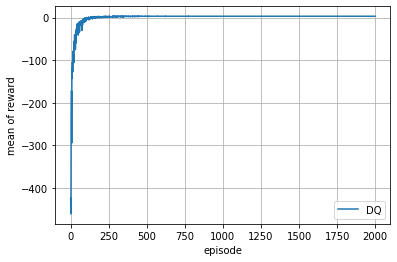

In [61]:
dicdq = vis_stat(datas_dq)
vis_list(dicdq, 'DQ')
# print(np.sum(np.array(datas_dq[2][-1]['r'])))
print(list(dicdq))

on-policy  : -30.861375
off-policy  : -31.541875


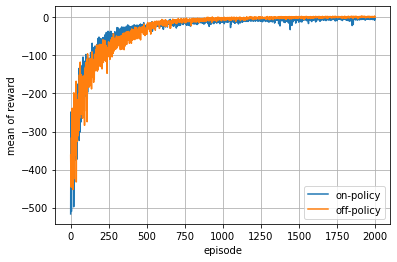

In [64]:
k=0
label = ['on-policy','off-policy']
for i in [dicon,dicof]:
  plt.plot(range(len(i)), i, label=label[k])
  print('%s  : %s'%(label[k],str(np.sum(np.array(i))/len(i))))
  k+=1
plt.ylabel('mean of reward')
plt.xlabel('episode')
plt.legend()
plt.grid()

on-policy  : -30.861375
off-policy  : -31.541875


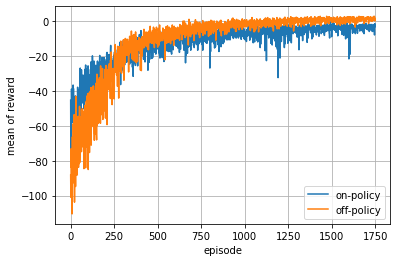

In [78]:
k=0
label = ['on-policy','off-policy']
for i in [dicon,dicof]:
  plt.plot(range(len(i[250:])), i[250:], label=label[k])
  print('%s  : %s'%(label[k],str(np.sum(np.array(i))/len(i))))
  k+=1
plt.ylabel('mean of reward')
plt.xlabel('episode')
plt.legend()
plt.grid()

on-policy  : -30.861375
off-policy  : -31.541875
sarsa  : -31.023625


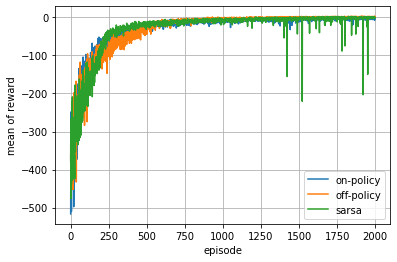

In [63]:
k=0
label = ['on-policy','off-policy','sarsa']
for i in [dicon,dicof,dicsa]:
  plt.plot(range(len(i)), i, label=label[k])
  print('%s  : %s'%(label[k],str(np.sum(np.array(i))/len(i))))
  k+=1
plt.ylabel('mean of reward')
plt.xlabel('episode')
plt.legend()
plt.grid()

on-policy  : -30.861375
off-policy  : -31.541875
sarsa  : -31.023625


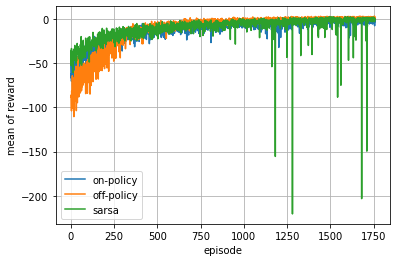

In [77]:
k=0
label = ['on-policy','off-policy','sarsa']
for i in [dicon,dicof,dicsa]:
  plt.plot(range(len(i[240:])), i[240:], label=label[k])
  print('%s  : %s'%(label[k],str(np.sum(np.array(i))/len(i))))
  k+=1
plt.ylabel('mean of reward')
plt.xlabel('episode')
plt.legend()
plt.grid()

sarsa  : -31.023625
2-step esarsa  : -28.2425
3-step tree backup  : -23.695375
DQ  : -0.31975


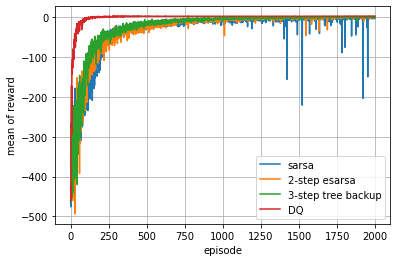

In [65]:
k=0
label = ['sarsa','2-step esarsa','3-step tree backup','DQ']
for i in [dicsa,dicesa,dictb,dicdq]:
  plt.plot(range(len(i)), i, label=label[k])
  print('%s  : %s'%(label[k],str(np.sum(np.array(i))/len(i))))
  k+=1
plt.ylabel('mean of reward')
plt.xlabel('episode')
plt.legend()
plt.grid()

sarsa  : -31.023625
2-step esarsa  : -28.2425
3-step tree backup  : -23.695375
DQ  : -0.31975


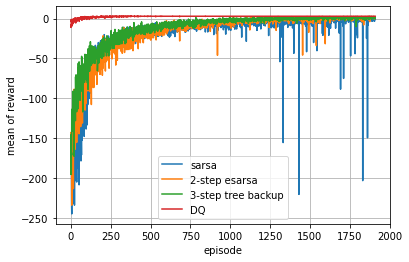

In [80]:
k=0
label = ['sarsa','2-step esarsa','3-step tree backup','DQ']
for i in [dicsa,dicesa,dictb,dicdq]:
  plt.plot(range(len(i[90:])), i[90:], label=label[k])
  print('%s  : %s'%(label[k],str(np.sum(np.array(i))/len(i))))
  k+=1
plt.ylabel('mean of reward')
plt.xlabel('episode')
plt.legend()
plt.grid()

on-policy  : -30.861375
off-policy  : -31.541875
sarsa  : -31.023625
2-step esarsa  : -28.2425
3-step tree backup  : -23.695375
DQ  : -0.31975


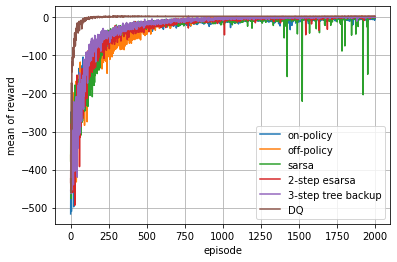

In [62]:
k=0
label = ['on-policy','off-policy','sarsa','2-step esarsa','3-step tree backup','DQ']
for i in [dicon,dicof,dicsa,dicesa,dictb,dicdq]:
  plt.plot(range(len(i)), i, label=label[k])
  print('%s  : %s'%(label[k],str(np.sum(np.array(i))/len(i))))
  k+=1
plt.ylabel('mean of reward')
plt.xlabel('episode')
plt.legend()
plt.grid()

on-policy  : -30.861375
off-policy  : -31.541875
sarsa  : -31.023625
2-step esarsa  : -28.2425
3-step tree backup  : -23.695375
DQ  : -0.31975


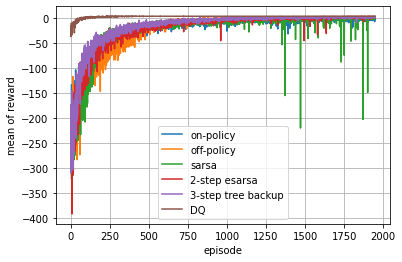

In [74]:
k=0
label = ['on-policy','off-policy','sarsa','2-step esarsa','3-step tree backup','DQ']
for i in [dicon,dicof,dicsa,dicesa,dictb,dicdq]:
  plt.plot(range(len(i[50:])), i[50:], label=label[k])
  print('%s  : %s'%(label[k],str(np.sum(np.array(i))/len(i))))
  k+=1
plt.ylabel('mean of reward')
plt.xlabel('episode')
plt.legend()
plt.grid()

### new environment with new rewards

In [66]:
import numpy as np

mu_ = np.mean(np.array([3,-5,-15,0]))
std_ = np.std(np.array([3,-5,-15,0])-np.array([mu_,mu_,mu_,mu_]))
mu_ = 0

r0 = (0-mu_)/std_
rm5 = (-5-mu_)/std_
rm15 = (-15-mu_)/std_
rp3 = (3-mu_)/std_

print(r0,rm5,rm15,rp3)

0.0 -0.7317617332646023 -2.195285199793807 0.4390570399587614


In [67]:
import random
import pprint
import io
import numpy as np
import sys
from gym.envs.toy_text import discrete
from colorama import Fore, Back, Style

UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3

class GridworldEnv(discrete.DiscreteEnv):
  metadata = {'render.modes': ['human', 'ansi']}

  def __init__(self, shape=[10,10]):
    if not isinstance(shape, (list, tuple)) or not len(shape) == 2:
        raise ValueError('shape argument must be a list/tuple of length 2')
        
    self.shape = shape

    nS = np.prod(shape)
    nA = 4

    MAX_Y = shape[0]
    MAX_X = shape[1]

    P = {}
    grid = np.arange(nS).reshape(shape)
    it = np.nditer(grid, flags=['multi_index'])

    while not it.finished:
      s = it.iterindex
      y, x = it.multi_index

      P[s] = {a : [] for a in range(nA)}

      #Reaching target
      is_done = lambda s: s == 0

      #Due to existance of walls, these moves are not available
      no_up = lambda s: s in [44,73,74]
      no_down = lambda s: s in [23,24,54]
      no_left = lambda s: s in [44,35,54,65]
      no_right = lambda s: s in [32,42,52,62]

      #Barries in the path
      pit = lambda s: s in [13,72,41]
      wall = lambda s: s in [43,33,53,34,64,63]

      #Rewards of each state
      reward = rp3 if is_done(s) else r0
      reward = rm15 if pit(s) else reward
      
      ns_up = s if y == 0 else s - MAX_X
      ns_right = s if x == (MAX_X - 1) else s + 1
      ns_down = s if y == (MAX_Y - 1) else s + MAX_X
      ns_left = s if x == 0 else s - 1
      
      P[s][UP] = [(1, ns_up, reward, is_done(ns_up))]
      P[s][RIGHT] = [(1.0, ns_right, reward, is_done(ns_right))]
      P[s][DOWN] = [(1, ns_down, reward, is_done(ns_down))]
      P[s][LEFT] = [(1, ns_left, reward, is_done(ns_left))]

      #Terminal state
      if is_done(s):
        P[s][UP] = [(1.0, s, reward, True)]
        P[s][RIGHT] = [(1.0, s, reward, True)]
        P[s][DOWN] = [(1.0, s, reward, True)]
        P[s][LEFT] = [(1.0, s, reward, True)]

      #Encountering walls
      if no_up(s):
        P[s][UP] = [(1.0, s, rm5 , False)]                
      if no_down(s):
        P[s][DOWN] = [(1.0, s, rm5 , False)]                
      if no_right(s):
        P[s][RIGHT] = [(1.0, s, rm5 , False)]  
      if no_left(s):
        P[s][LEFT] = [(1.0, s, rm5 , False)] 

      it.iternext() 

    # Initial state distribution is uniform
    isd = np.zeros(100)
    isd[44]=1
    self.P = P

    super(GridworldEnv, self).__init__(nS, nA, P, isd)

  def _render(self, mode='human', close=False):
    if close:
      return

    outfile = io.StringIO() if mode == 'ansi' else sys.stdout

    grid = np.arange(self.nS).reshape(self.shape)
    it = np.nditer(grid, flags=['multi_index'])

    while not it.finished:
      s = it.iterindex
      y, x = it.multi_index

      if self.s == s and not s==0:
        output =  Back.CYAN + Style.BRIGHT + Fore.WHITE +  "  웃 " + Style.RESET_ALL if s not in [13,72,41] else Back.BLUE + Style.BRIGHT + Fore.WHITE + "  웃 " + Style.RESET_ALL
      elif s == 0:
          output = Back.GREEN + Style.BRIGHT + Fore.WHITE + "     " + Style.RESET_ALL if not self.s==0 else Back.GREEN + Style.BRIGHT + Fore.WHITE +  "  웃 " + Style.RESET_ALL
      elif s in [13,72,41]:
          output = Back.BLUE + "     " + Style.RESET_ALL
      elif s in [43,33,53,34,64,63]:
          output = Back.CYAN + Style.BRIGHT + Fore.BLACK +   "  █  "  + Style.RESET_ALL
      else:
          output = Back.CYAN + Style.BRIGHT + Fore.BLACK +  "  .  " + Style.RESET_ALL

      if x == 0:
          output = output.lstrip()
      if x == self.shape[1] - 1:
          output = output.rstrip()

      outfile.write(output)

      if x == self.shape[1] - 1:
          outfile.write("\n")

      it.iternext()

In [68]:
env2 =  GridworldEnv()
agent2 = DQAgent('id', env2, 100, 4, eps=0.5)

In [69]:
datas_dq2 = run(2000, 20, float('inf'), agent2, env2)
# show_policy_in_game(agent, env)

Streaming output truncated to the last 5000 lines.
1.4898304190325007e-06
1.5753743047852709e-06
1.3945378629642846e-06
1.4389924603008808e-06
1.5285956331823058e-06
1.5132889030766705e-06
1.4025866210687354e-06
1.4831698216255518e-06
1.3767564288613698e-06
1.3629708908169391e-06
1.349339323830634e-06
1.4247514492637947e-06
1.322500808420557e-06
1.3963947882444927e-06
1.2961666229216462e-06
1.368602587703549e-06
1.2703415199766255e-06
1.2557938662283163e-06
1.187345519682026e-06
1.3146949910947114e-06
1.2202832984087308e-06
1.288529063003807e-06
1.1959856811571967e-06
1.2628839751727128e-06
1.2502409560966044e-06
1.2377246498829209e-06
1.2253337811074516e-06
1.2130670938859112e-06
1.2009233394394414e-06
1.1147087004559353e-06
1.0524318678761801e-06
1.1652614109181059e-06
1.0800601977223323e-06
1.1420699630448894e-06
1.0585451750699804e-06
1.0008419986107242e-06
1.1081553994429783e-06
1.097062925836667e-06
1.018320709533782e-06
1.0752289405502324e-06
1.0644663710479563e-06
1.05381163262

DQN  : 0.0137754146287063
[-42.55194478933662, -44.820406162456884, -35.89291301662875, -36.00267727661843, -26.343422397525682, -30.77058088377653, -30.624228537123606, -19.098981238206118, -23.0870826844982, -19.75756679814426, -19.79415488480749, -19.28192167152227, -16.903696038412313, -25.977541530893383, -18.001338638309218, -14.927939358597888, -19.6843906248178, -10.939837912305805, -13.2448873720893, -15.9158176985051, -12.147244772192398, -11.342306865601337, -12.915594592120229, -9.73243105241921, -8.012790979247393, -7.903026719257705, -6.622443686044652, -6.183386646085889, -5.1223321328522164, -6.402915166065268, -6.402915166065272, -7.171264985993103, -7.354205419309254, -4.061277619618542, -5.634565346137438, -6.951736466013723, -4.5003346595773035, -5.451624912821288, -5.524801086147749, -5.488212999484518, -5.305272566168367, -4.171041879608234, -2.3050494597834974, -2.6709303264157986, -2.9636350197216395, -2.780694586405489, -4.317394226261153, -3.841749099639162, -

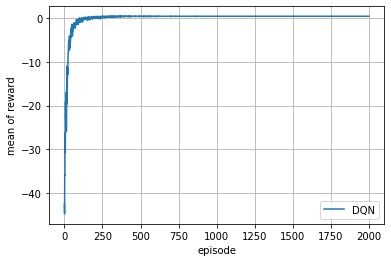

In [71]:
dicdq2 = vis_stat(datas_dq2)
vis_list(dicdq2, 'DQN')
# print(np.sum(np.array(datas_dq[2][-1]['r'])))
print(list(dicdq2))

DQN  : 0.0137754146287063
DQ  : -0.31975


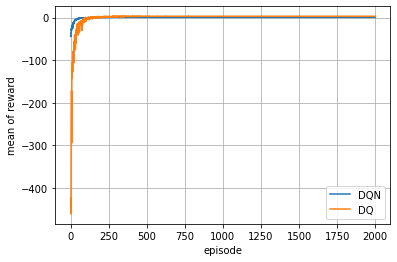

In [72]:
k=0
label = ['DQN','DQ']
for i in [dicdq2,dicdq]:
  plt.plot(range(len(i)), i, label=label[k])
  print('%s  : %s'%(label[k],str(np.sum(np.array(i))/len(i))))
  k+=1
plt.ylabel('mean of reward')
plt.xlabel('episode')
plt.legend()
plt.grid()

DQN  : 0.0137754146287063
DQ  : -0.31975


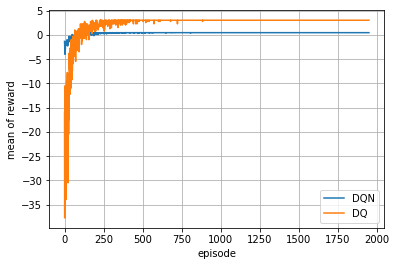

In [73]:
k=0
label = ['DQN','DQ']
for i in [dicdq2,dicdq]:
  plt.plot(range(len(i[50:])), i[50:], label=label[k])
  print('%s  : %s'%(label[k],str(np.sum(np.array(i))/len(i))))
  k+=1
plt.ylabel('mean of reward')
plt.xlabel('episode')
plt.legend()
plt.grid()